# Quickstart

In [1]:
from simtool import findInstalledSimToolNotebooks,searchForSimTool
from simtool import getSimToolInputs,getSimToolOutputs,Run

import numpy as np

In [2]:
# specify a simtool

simToolName = "test_simtool"
simToolLocation = searchForSimTool(simToolName)
for key in simToolLocation.keys():
    print("%18s = %s" % (key,simToolLocation[key]))

      notebookPath = /home/nanohub/clarksm/Simtool/simtool/tests/notebooks/simtool/test_simtool.ipynb
       simToolName = test_simtool
   simToolRevision = None
         published = False


## Setting Inputs

In [3]:
# get the list of inputs for the simtool.
inputs = getSimToolInputs(simToolLocation)
inputs

some_text:
    desc: Text to Write in Output Image
    type: Text
    maxlen: 20
    value: Default Text

volts:
    desc: Value to Write in Output Image
    type: Number
    units: millivolt
    max: 1000
    value: 0

width:
    desc: Width of Output Image in pixels
    type: Integer
    min: 100
    max: 2000
    value: 400

height:
    desc: Height of Output Image in pixels
    type: Integer
    min: 50
    max: 1000
    value: 200

position:
    desc: Position of text in image [x, y] in pixels
    type: List
    value: [20, 20]

options:
    desc: Color and Font Size Options.
    type: Dict
    value: {'FontSize': 28, 'FontColor': 'red', 'Background': 'black'}

myarray:
    type: Array
    dim: 1

In [4]:
# get the outputs, if we are curious
getSimToolOutputs(simToolLocation)

volts:
    desc: Input 'volts' returned from SimTool
    type: Number
    units: millivolt

myarray:
    desc: The array that was input, doubled.
    type: Array

PNG:
    desc: Image as a PNG
    type: Image

JPG:
    desc: Image as a JPG
    type: Image

GIF:
    desc: Image as a GIF
    type: Image

nanohub:
    desc: Our logo!
    type: Image

In [5]:
# set the input array
inputs.myarray.value = np.array([[1, 2.0, 3.14],[4,5,6]])

In [6]:
# check the input volts
inputs.volts

    desc: Value to Write in Output Image
    type: Number
    units: millivolt
    max: 1000
    value: 0

In [7]:
# try setting it to something bad.  it will fail
#inputs.volts.value = '20g'
inputs.volts.value = 20
inputs.volts

    desc: Value to Write in Output Image
    type: Number
    units: millivolt
    max: 1000
    value: 20

In [8]:
# use units, if you want
inputs.volts.value = '.082 V'
inputs.volts.value

82.0

## Running the Simtool

In [9]:
# Do a single run with those inputs
# Default is to put the run in RUNS/uuid.
#r = Run(simToolLocation, inputs, cache=False)

r = Run(simToolLocation, inputs)

runname   = c42d6e45163047d0825aa4dac8e20807
outdir    = RUNS/c42d6e45163047d0825aa4dac8e20807
cached    = False
published = False
submit --local papermill -f inputs.yaml
       /home/nanohub/clarksm/Simtool/simtool/tests/notebooks/simtool/test_simtool.ipynb
       test_simtool.ipynb


Input Notebook:  /home/nanohub/clarksm/Simtool/simtool/tests/notebooks/simtool/test_simtool.ipynb
Output Notebook: test_simtool.ipynb
Executing: 100%|██████████| 16/16 [00:13<00:00,  1.23cell/s]


## Visualizing the Outputs

In [10]:
# we can see the inputs used
r.inputs.myarray.value

[[1.0, 2.0, 3.14], [4.0, 5.0, 6.0]]

In [11]:
r.inputs.volts.value

82.0

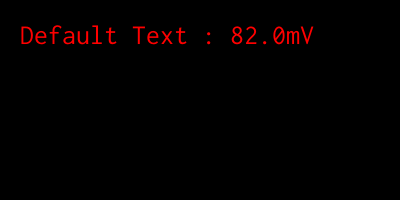

In [12]:
# output database is accessed from the Run object

r.read('PNG')

In [13]:
# see raw results database
r.getResultSummary()

,name,data,encoder,display,filename
0,simToolSaveErrorOccurred,0,text,None,test_simtool.ipynb
1,simToolAllOutputsSaved,1,text,None,test_simtool.ipynb
2,volts,82.0,text,None,test_simtool.ipynb
3,myarray,"{""py/reduce"": [{""py/function"": ""numpy.core.mul...",text,None,test_simtool.ipynb
4,PNG,file://foo.png,text,None,test_simtool.ipynb
5,JPG,"{""py/object"": ""PIL.Image.Image"", ""py/state"": [...",text,None,test_simtool.ipynb
6,GIF,file://foo.gif,text,None,test_simtool.ipynb
7,nanohub,file://nanoHUB_logo_color.png,text,None,test_simtool.ipynb


In [14]:
# where is my output?

print(r.outdir)

RUNS/c42d6e45163047d0825aa4dac8e20807


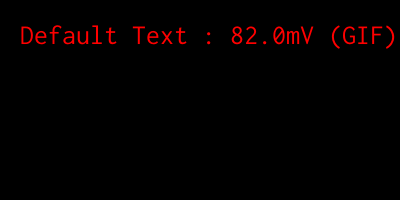

In [15]:
r.read('GIF')

In [16]:
r.read('volts')

82.0

In [17]:
r.read('myarray')

array([[ 4.1  ,  8.2  , 12.874],
       [16.4  , 20.5  , 24.6  ]])

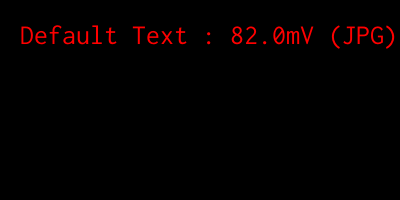

In [18]:
x = r.read('JPG')
x

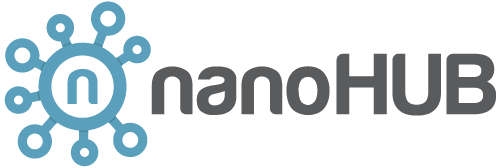

In [19]:
hublogo = r.read('nanohub', display=True)

<class 'PIL.PngImagePlugin.PngImageFile'>


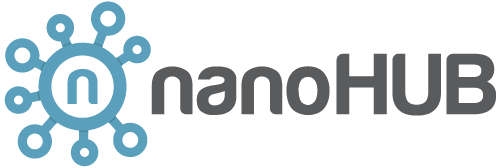

In [20]:
print(type(hublogo))
hublogo

## Extras

In [21]:
# for debugging, the inputs as passed to papermill
r.input_dict

{'some_text': 'Default Text',
 'volts': 82.0,
 'width': 400,
 'height': 200,
 'position': [20, 20],
 'options': {'FontSize': 28, 'FontColor': 'red', 'Background': 'black'},
 'myarray': [[1.0, 2.0, 3.14], [4.0, 5.0, 6.0]]}